<a href="https://colab.research.google.com/github/PQ-Trung/hello-world-1/blob/master/Bien_bao_gthong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
train_path = "/content/drive/My Drive/data/train.p"
test_path = "/content/drive/My Drive/data/test.p"
valid_path = "/content/drive/My Drive/data/valid.p"

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import pandas as pd

In [0]:
import pickle

In [0]:
with open(train_path, mode = 'rb') as f:
    train = pickle.load(f)

In [0]:
with open(valid_path, mode = 'rb') as f:
    valid = pickle.load(f)

In [0]:
with open(test_path, mode = 'rb') as f:
    test = pickle.load(f)

In [0]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [0]:
trainX = train["features"]
trainY = train["labels"]

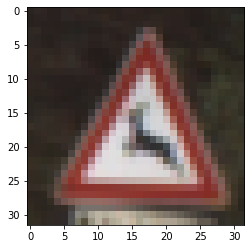

In [9]:
import matplotlib.pyplot as plt

plt.imshow(trainX[500])

In [0]:
from sklearn.utils import shuffle

In [0]:
trainX, trainY = shuffle(trainX, trainY)

In [0]:
validX = valid['features']
validY = valid['labels']

testX = test['features']
testY = test['labels']

In [0]:
# Normalize
trainX = trainX.astype('float')/255.0
validX = validX.astype('float')/255.0
testX = testX.astype('float')/255.0

In [0]:
from sklearn.preprocessing import LabelBinarizer

In [0]:
lb = LabelBinarizer() # chuan hoa ket qua ve onehot

In [0]:
trainY = lb.fit_transform(trainY)
validY = lb.fit_transform(validY)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Conv2D, Activation, Dropout
from tensorflow.keras.layers import Flatten, Input, Dense, concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD


In [0]:
model = Sequential()

model.add(Conv2D(32,(3,3), padding = 'same', input_shape = (32,32,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dense(43, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

In [0]:
# Tăng cường data
aug = ImageDataGenerator(rotation_range=0.18, zoom_range = 0.15,
                         width_shift_range = 0.2, height_shift_range = 0.2,
                         horizontal_flip = True)

learning_rate = 0.01

In [0]:
epochs = 10
batch_size = 64

opt = SGD(learning_rate = learning_rate,
          momentum = 0.9)

In [0]:
model.compile(optimizer = opt, 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

In [25]:
print('Start Traing!')
H = model.fit_generator(aug.flow(trainX, trainY, batch_size = batch_size),
                        validation_data = (validX, validY),
                        steps_per_epoch = trainX.shape[0]/batch_size,
                        epochs = epochs, verbose = 1)

Start Traing!
Epoch 1/10
544/543 [==============================] - 19s 36ms/step - loss: 2.1659 - accuracy: 0.4022 - val_loss: 2.1722 - val_accuracy: 0.4726
Epoch 2/10
544/543 [==============================] - 18s 34ms/step - loss: 0.8730 - accuracy: 0.7148 - val_loss: 1.4812 - val_accuracy: 0.5948
Epoch 3/10
544/543 [==============================] - 19s 34ms/step - loss: 0.4545 - accuracy: 0.8463 - val_loss: 1.2710 - val_accuracy: 0.6952
Epoch 4/10
544/543 [==============================] - 19s 35ms/step - loss: 0.2653 - accuracy: 0.9124 - val_loss: 1.0555 - val_accuracy: 0.7467
Epoch 5/10
544/543 [==============================] - 20s 36ms/step - loss: 0.1874 - accuracy: 0.9367 - val_loss: 0.9058 - val_accuracy: 0.7721
Epoch 6/10
544/543 [==============================] - 19s 34ms/step - loss: 0.1426 - accuracy: 0.9540 - val_loss: 0.7858 - val_accuracy: 0.8179
Epoch 7/10
544/543 [==============================] - 18s 34ms/step - loss: 0.1088 - accuracy: 0.9637 - val_loss: 0.9115 -

In [0]:
model.save('bienbaogt.h5')

In [0]:
saved_model = tf.keras.models.load_model('bienbaogt.h5')

Keep right


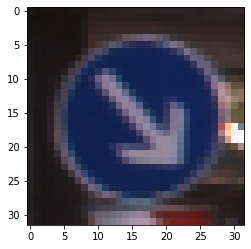

In [35]:
result = saved_model.predict(testX[5:6])
final = np.argmax(result)
final = classNames[final]
print(final)
plt.imshow(test['features'][5])